# **Import Library**

In [258]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Import Dataset**

In [259]:
df=pd.read_csv('/content/Netflix dataset.csv',engine='python')# Read the data set

In [260]:
df.head(10) # Visualize of dataset of first ten observation

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


In [261]:
df.info() # check the overall information incluning no. of rows and columns, also from here we got the information about data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [262]:
df.isnull().sum() # Check the missing values

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


In [263]:
df.drop('Poster_Url', axis=1, inplace=True) # This feature is not necessary for my analysis
df.drop('Original_Language',axis=1, inplace=True) # this feature is not necessary for my analysis
df.drop('Overview',axis=1, inplace=True) # this feature is not necessary for my analysis

In [264]:
df['Title']=df['Title'].fillna(df['Title'].mode().iloc[0]) # Title is a categorical variable, so we will impute mood for missing value imputation

In [265]:
df['Vote_Count']=pd.to_numeric(df['Vote_Count'],errors='coerce') # To covert the object into numerical values
df['Vote_Count']=df['Vote_Count'].fillna(df['Vote_Count'].mean()).astype(int)# convert the folat into integer values and mean imputation in missing values

In [266]:
df['Vote_Average']=pd.to_numeric(df['Vote_Average'],errors='coerce') # To convert the object into numerical value
df['Vote_Average']=df['Vote_Average'].fillna(df['Vote_Average'].mean()).astype(int) # convert the float unto integer values and mean imputation

In [267]:
df['Release_Date']=pd.to_datetime(df['Release_Date'], errors='coerce') # Convert Relaese date into date time formate
df['Release_Date']=df['Release_Date'].dt.year # Convert Relaese date into year
df['Release_Date'] = df['Release_Date'].fillna(0).astype(int) # Convert into integer formate

In [268]:
df['Popularity']=df['Popularity'].fillna(df['Popularity'].mean()).astype(int) # mean imputation into variable Popularity


In [269]:
df.describe() # Display the summary

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9837.000000,9837.000000,9837.000000,9837.000000
mean,2004.164176,39.824845,1392.942665,6.000102
std,65.829992,108.819390,2609.843284,1.138221
min,0.000000,7.000000,0.000000,0.000000
25%,2000.000000,16.000000,146.000000,5.000000
50%,2011.000000,21.000000,445.000000,6.000000
75%,2017.000000,35.000000,1382.000000,7.000000
max,2024.000000,5083.000000,31077.000000,10.000000


In [270]:
df.Genre.unique() # Checque the unique vales

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [271]:
top5 = df.sort_values(by="Popularity", ascending=False).head(5) # Sort the dataframe by popularity in discending order.
print("Top 5 Most Popular Movies:") # Print the heading message for clearity
print(top5[["Title", "Popularity"]]) # Display only the Title and Popularity columns from the top 5 movies

Top 5 Most Popular Movies:
                     Title  Popularity
0  Spider-Man: No Way Home        5083
1               The Batman        3827
2                  No Exit        2618
3                  Encanto        2402
4           The King's Man        1895


**Spiderman is the top most popular movie in this analysis.Where the value is 5083**

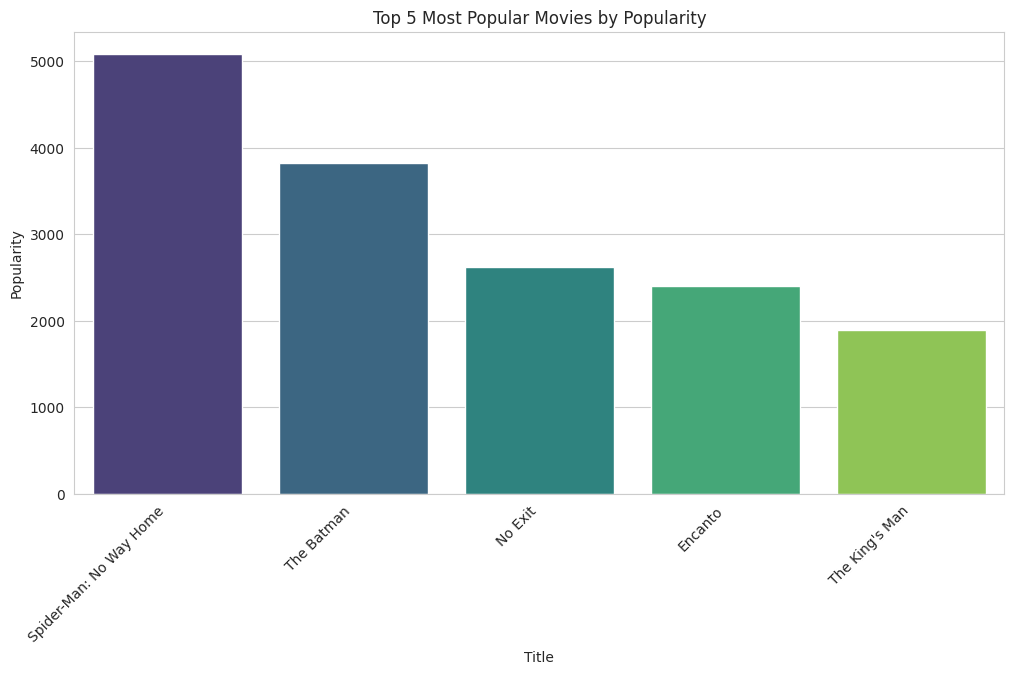

In [272]:
sns.barplot(x='Title', y='Popularity', data=top5, palette='viridis') # Create a barplot showing the popularity of the top 5 movies.
plt.title('Top 5 Most Popular Movies by Popularity') # Add a title to the chart
plt.xticks(rotation=45, ha='right') # Rotate to the xlabel for better quality
plt.show() # Visualiztion of the bar plot

**In this bar diagram we have viualized the popularity of different movies. From this Bar diagram it is clear that Spiderman:No Way Home is the most popular moivie**

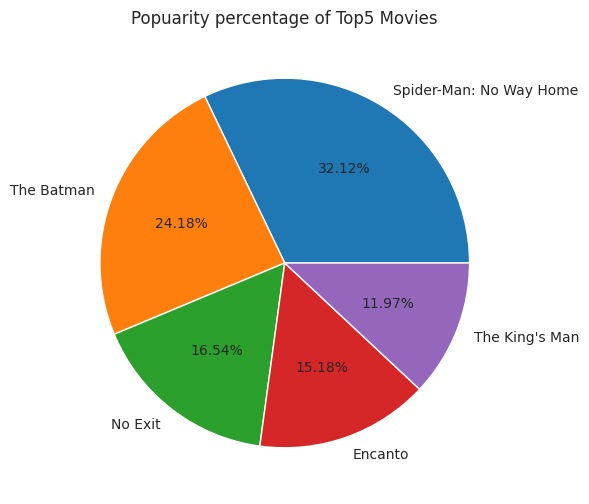

In [273]:
plt.pie(top5['Popularity'],labels=top5['Title'],autopct='%1.2f%%') # Create a pie plot
plt.title('Popuarity percentage of Top5 Movies') # naming the pie plot
plt.show() # Visualization of the pie plot

**According to pie chart distribution Spiderman is the most popular movie. this movie is popular to abobe 32.12% people**

In [221]:
df['Genre']=df['Genre'].str.split(',') # Split the genre column for each movie
df=df.explode('Genre').reset_index(drop=True) #Convert each list in separate rows
df['Genre'].astype('category') #Convert the datatype into category
df['Genre'] = df['Genre'].str.strip().str.title()   # Remove extra spaces and formate genre name

In [222]:
df['Genre']=df['Genre'].fillna(df['Genre'].mode().iloc[0]) # Missing value impuation by mode

In [224]:
df['Genre'].value_counts()# Counts the individual value of each genre

,count
Genre,
Drama,3755
Comedy,3031
Action,2686
Thriller,2488
Adventure,1853
Romance,1476
Horror,1470
Animation,1438
Family,1414


**After our analysis we have confirmed that most of the genre are drama type**

<Axes: xlabel='count', ylabel='Genre'>

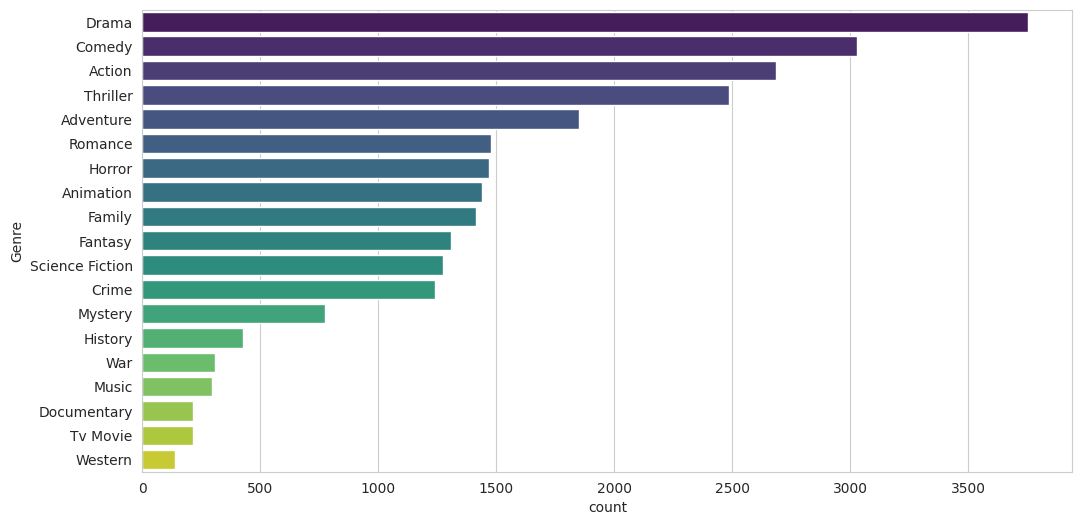

In [225]:
sns.set_style('whitegrid') # Set a clean white background plot.
matplotlib.rcParams['figure.figsize'] = (12,6) # Set the figure size.
sns.countplot(data=df, y="Genre", palette='viridis', order=df['Genre'].value_counts().index) # Create a horizontal bar chart with each value counts

<function matplotlib.pyplot.show(close=None, block=None)>

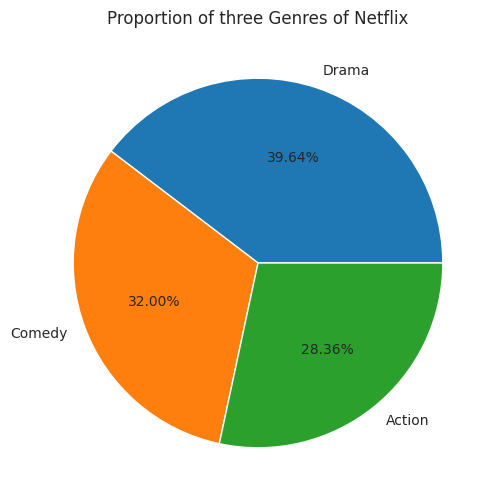

In [226]:
Top_Genres = df['Genre'].value_counts().head(3) # Get the top most three grnres based on their value counts
plt.pie(Top_Genres,labels=Top_Genres.index, autopct='%1.2f%%') # Creating a pie chart of showing three top genres with their percentage
plt.title('Proportion of three Genres of Netflix') # Creating the title of the pie chart
plt.show # Display the pie chart

**In nteflix 36.94% genrees are drama type. This is the hegiest percentage of genree type in netflix, where 32% are commedy and 28.36% are action**

In [227]:
def categorize_col(df,col,labels): # Define a function to categorize numrical feature into ranges based on column
  edges=[df[col].describe()['min'], # Minimum value
         df[col].describe()['25%'], # First qurantile
         df[col].describe()['50%'], # Median value( Second qurantile)
         df[col].describe()['75%'], # Third qurantile
         df[col].describe()['max']] # Maximum value
  df[col]=pd.cut(df[col],edges, labels=labels, duplicates='drop') #  Use pd.cut() to divide the column into categories based on quartile edges
  return df

In [228]:
labels=['Not_Popular','Average','Popular'] # Define labels
categorize_col(df, 'Vote_Average',labels) # Categorized Vote_Average Column

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083,8940,Popular,Science Fiction
3,2022,The Batman,3827,1151,Popular,Crime
4,2022,The Batman,3827,1151,Popular,Mystery
...,...,...,...,...,...,...
25798,2021,The United States vs. Billie Holiday,13,152,Not_Popular,Drama
25799,2021,The United States vs. Billie Holiday,13,152,Not_Popular,History
25800,1984,Threads,13,186,Average,War
25801,1984,Threads,13,186,Average,Drama


In [229]:
df['Vote_Average'].value_counts() # Count the value of vote average into three distinct categories

,count
Vote_Average,
Not_Popular,16934
Average,7517
Popular,1111


<Axes: xlabel='Vote_Average', ylabel='count'>

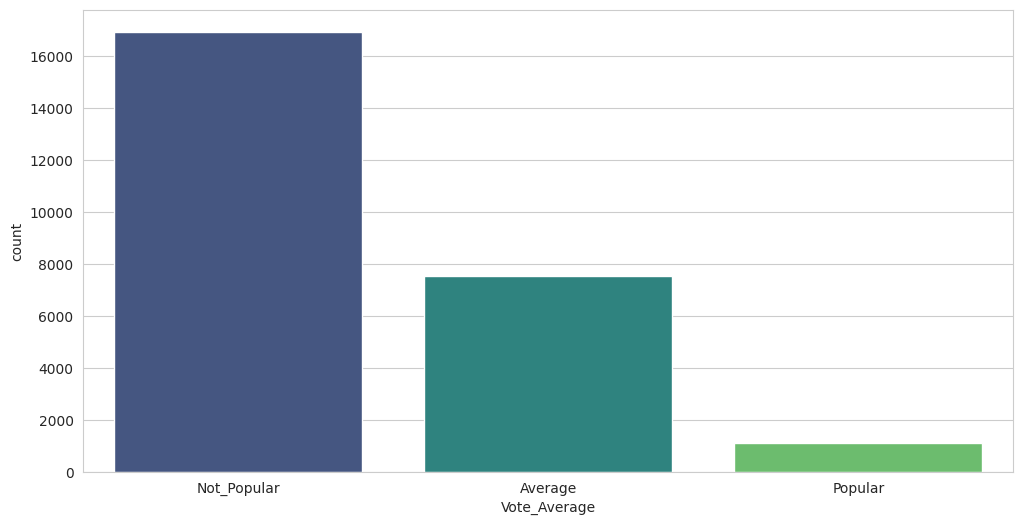

In [230]:
sns.countplot(x='Vote_Average',data=df, palette='viridis') # Visualize with counting by bar diagram

**Most of the netflix content are not popular. In our dataset this is the dominating figure.According to our dataset 16934 content are not popular, where very less amount content are popular. the number of the popular content was 1111.**

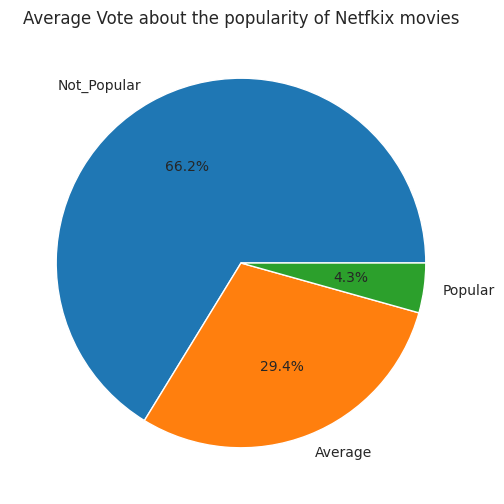

In [231]:
plt.pie(df['Vote_Average'].value_counts(),labels=labels, autopct='%1.1f%%') # Creating a pie chart showing percentage distribution
plt.title('Average Vote about the popularity of Netfkix movies') # Title of the pie chart
plt.show() # Visualize the pie chart

**In netflix most of the content are not popular. In percentage 66.2% content are not popular. Where very less amount of movies are popular. It is approximately 4.3%**

In [242]:
df['Release_Date'].value_counts().head(5) # Get the top most five year in which year the relaese amount of movie is higher

,count
Release_Date,
2021,1638
2018,1387
2017,1365
2019,1272
2016,1212


**In 2021 the heighest number of movie is released, the number of released movie in 2021 is 1638, which is the heighest amount in our study.**

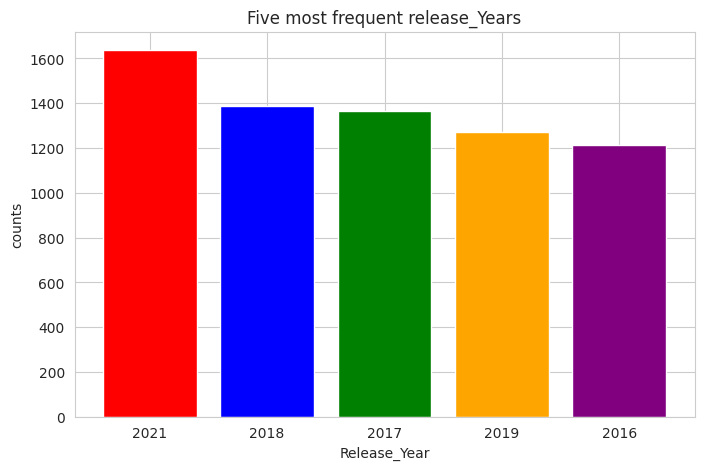

In [257]:
counts=df['Release_Date'].value_counts().head(5) # Calculate the top five most frequent release year
plt.figure(figsize=(8,5)) # Create a specfic gigure where width is 8, height is 5
plt.bar(counts.index.astype(str),counts.values,color = ['red', 'blue', 'green', 'orange', 'purple']) #Plot a bar chart
plt.xlabel('Release_Year') # label the X-Axis
plt.ylabel('counts')  # label the Y-axis
plt.title('Five most frequent release_Years') # Create the title name of the barplot
plt.show() # Visualize the plot

**In visualization for the bar digram we have used multicolor plot, where red bar line indicates 2021, in which year most of the movie is releaesed.**